In [78]:
import kaggle as kg
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import RMSprop

In [79]:
os.environ["KAGGLE_USERNAME"] = "ardra1111"
os.environ["KAGGLE_KEY"] = "37d20ba8d54c672e60004d474d1ebeed"

In [80]:
kg.api.authenticate()

In [81]:
kg.api.dataset_download_files(dataset="medahmedkrichen/devanagari-handwritten-character-datase",
                              path="dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/medahmedkrichen/devanagari-handwritten-character-datase


dataset/DevanagariHandwrittenCharacterDataset/Train/character_27_ra/82716.png
(32, 32)


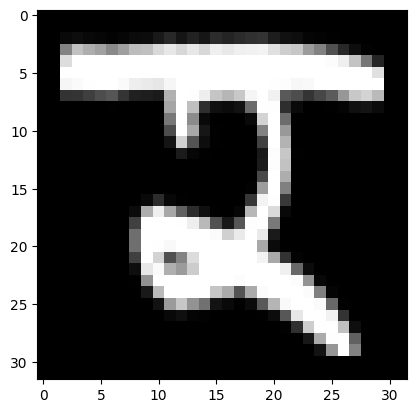

In [82]:
for single_class_dir_path in pathlib.Path("dataset/DevanagariHandwrittenCharacterDataset/Train").glob("*"):

    for single_class_img_path in pathlib.Path(single_class_dir_path).glob("*.png"):

        print(single_class_img_path)
                
        print(plt.imread(single_class_img_path).shape)

        plt.imshow(plt.imread(single_class_img_path),cmap="gray")

        break

    break  

In [83]:
def train_test_df(path):

    img_path = list()
    img_label = list()

    for single_class_dir_path in pathlib.Path(path).glob("*"):

        for single_class_img_path in pathlib.Path(single_class_dir_path).glob("*.png"):

            img_path.append(str(single_class_img_path))
            #print(str(single_class_img_path).split("/")[-2].split("_")[-1])
            img_label.append(str(single_class_img_path).split("/")[-2].split("_")[-1])

    return pd.DataFrame(data={"img_path":img_path,"label":img_label})

In [84]:
train_path = "dataset/DevanagariHandwrittenCharacterDataset/Train"
test_path = "dataset/DevanagariHandwrittenCharacterDataset/Test"

In [85]:
training_data = train_test_df(train_path)
testing_data = train_test_df(test_path)

In [86]:
training_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,ra
1,dataset/DevanagariHandwrittenCharacterDataset/...,ra
2,dataset/DevanagariHandwrittenCharacterDataset/...,ra
3,dataset/DevanagariHandwrittenCharacterDataset/...,ra
4,dataset/DevanagariHandwrittenCharacterDataset/...,ra
...,...,...
78195,dataset/DevanagariHandwrittenCharacterDataset/...,5
78196,dataset/DevanagariHandwrittenCharacterDataset/...,5
78197,dataset/DevanagariHandwrittenCharacterDataset/...,5
78198,dataset/DevanagariHandwrittenCharacterDataset/...,5


In [87]:
testing_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,ra
1,dataset/DevanagariHandwrittenCharacterDataset/...,ra
2,dataset/DevanagariHandwrittenCharacterDataset/...,ra
3,dataset/DevanagariHandwrittenCharacterDataset/...,ra
4,dataset/DevanagariHandwrittenCharacterDataset/...,ra
...,...,...
13795,dataset/DevanagariHandwrittenCharacterDataset/...,5
13796,dataset/DevanagariHandwrittenCharacterDataset/...,5
13797,dataset/DevanagariHandwrittenCharacterDataset/...,5
13798,dataset/DevanagariHandwrittenCharacterDataset/...,5


In [88]:
character2int = dict(zip(training_data["label"].unique(),range(len(training_data["label"].unique()))))

In [89]:
character2int

{'ra': 0,
 'chha': 1,
 'patalosaw': 2,
 'dha': 3,
 'la': 4,
 'ga': 5,
 'yaw': 6,
 'na': 7,
 '3': 8,
 'petchiryakha': 9,
 'pha': 10,
 'gya': 11,
 'da': 12,
 'kha': 13,
 'tha': 14,
 '1': 15,
 'ja': 16,
 '4': 17,
 'ma': 18,
 'motosaw': 19,
 'chhya': 20,
 'ha': 21,
 '6': 22,
 'taamatar': 23,
 '2': 24,
 'yna': 25,
 'adna': 26,
 'tra': 27,
 'kna': 28,
 'tabala': 29,
 'ba': 30,
 'waw': 31,
 '7': 32,
 'pa': 33,
 '0': 34,
 'jha': 35,
 'bha': 36,
 'daa': 37,
 '9': 38,
 '8': 39,
 'dhaa': 40,
 'gha': 41,
 'cha': 42,
 'thaa': 43,
 'ka': 44,
 '5': 45}

In [90]:
training_data["label"].replace(to_replace=character2int.keys(),value=character2int.values(),
                               inplace=True)

/tmp/ipykernel_8807/2698354796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data["label"].replace(to_replace=character2int.keys(),value=character2int.values(),
/tmp/ipykernel_8807/2698354796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data["label"].replace(to_replace

In [91]:
training_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,0
1,dataset/DevanagariHandwrittenCharacterDataset/...,0
2,dataset/DevanagariHandwrittenCharacterDataset/...,0
3,dataset/DevanagariHandwrittenCharacterDataset/...,0
4,dataset/DevanagariHandwrittenCharacterDataset/...,0
...,...,...
78195,dataset/DevanagariHandwrittenCharacterDataset/...,45
78196,dataset/DevanagariHandwrittenCharacterDataset/...,45
78197,dataset/DevanagariHandwrittenCharacterDataset/...,45
78198,dataset/DevanagariHandwrittenCharacterDataset/...,45


In [92]:
testing_data.replace(to_replace=character2int.keys(),value=character2int.values(),
                     inplace=True)

/tmp/ipykernel_8807/3185811566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_data.replace(to_replace=character2int.keys(),value=character2int.values(),


In [93]:
testing_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,0
1,dataset/DevanagariHandwrittenCharacterDataset/...,0
2,dataset/DevanagariHandwrittenCharacterDataset/...,0
3,dataset/DevanagariHandwrittenCharacterDataset/...,0
4,dataset/DevanagariHandwrittenCharacterDataset/...,0
...,...,...
13795,dataset/DevanagariHandwrittenCharacterDataset/...,45
13796,dataset/DevanagariHandwrittenCharacterDataset/...,45
13797,dataset/DevanagariHandwrittenCharacterDataset/...,45
13798,dataset/DevanagariHandwrittenCharacterDataset/...,45


In [94]:
Y_true_train = to_categorical(training_data["label"],num_classes=46)

In [95]:
Y_true_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [96]:
Y_true_test = to_categorical(testing_data["label"],num_classes=46)

In [97]:
Y_true_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [98]:
Y_true_test = to_categorical(testing_data["label"],num_classes=46)

In [99]:
Y_true_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [100]:
def multiclass_dnn():
    
    input_to_dnn = Input(shape=(1024,)) # the neural network has 1024 vectors
    #ther are 1024 neurons, we will get a matrix of size 1024 x 1024. every nueron has a seperate bias
    first_dense_out = Dense(units=1024,activation ="relu") (input_to_dnn) # relu for hidden layers dimension is 1024
    output = Dense(units =46, activation="softmax") (first_dense_out) # dimention 46 cuz size 1024 x 46 (dimension is the number of columns)

    
    return Model (inputs = [input_to_dnn],outputs = [output])

In [101]:
def custom_data_generator(data_df, Y_true, mb_size):

    for time_step in range(data_df.shape[0]//mb_size):
        X_mb = list()

        for img_path in data_df.iloc[time_step*mb_size:(time_step+1)*mb_size,0]:

            img_np_array = plt.imread(img_path)
            reshaped_np_array = img_np_array.reshape(1024,)
            X_mb.append(reshaped_np_array)

        X_mb = np.array(X_mb)
        Y_true_mb = Y_true[time_step*mb_size:(time_step+1)*mb_size]

        yield X_mb, Y_true_mb

In [102]:
generator = custom_data_generator(training_data,782)

TypeError: custom_data_generator() missing 1 required positional argument: 'mb_size'

In [ ]:
X_train_mb, Y_train_mb = generator.__next__()

In [ ]:
X_train_mb.shape

(782, 1024)

In [ ]:
Y_train_mb.shape

(782, 46)

In [ ]:
epochs = 50
training_data_mb_size = 782
testing_data_mb_size = 138

In [ ]:
model = multiclass_dnn()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        47,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,096,750 (4.18 MB)

 Trainable params: 1,096,750 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def loss_fn(Y_true_mb,Y_pred_mb):

    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_true_mb,
                                                                          y_pred=Y_pred_mb))

optimizer = RMSprop()

In [ ]:
@tf.function
def training_step(X_train_mb,Y_true_train_mb):

    with tf.GradientTape() as tape:
            
        Y_pred_train_mb = model(X_train_mb, training=True)
        training_loss = loss_fn(Y_true_train_mb, Y_pred_train_mb)

    grads = tape.gradient(training_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    train_acc_metric.update_state(Y_true_train_mb,Y_pred_train_mb)

    return training_loss

In [ ]:
@tf.function
def testing_forward_pass(X_test_mb,Y_true_test_mb):

    Y_pred_test_mb = model(X_test_mb,training=False)
    testing_loss = loss_fn(Y_true_test_mb,Y_pred_test_mb)
    test_acc_metric.update_state(Y_true_test_mb,Y_pred_test_mb)

    return testing_loss

In [103]:
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
test_acc_metric = tf.keras.metrics.CategoricalAccuracy()

for epoch in range(epochs):

    training_data_generator = custom_data_generator(training_data, Y_true_train, 782)

    for time_step, (X_train_mb, Y_true_train_mb) in enumerate(training_data_generator):
        training_loss = training_step(X_train_mb, Y_true_train_mb)
        train_acc_metric.update_state(Y_true_train_mb, model(X_train_mb, training=False))

        if (time_step+1) % 50 == 0:
            print("Epoch %d, Time Step %d, Training loss for one mini batch: %.4f" % (epoch+1, time_step+1, float(training_loss)))
            
    training_acc = train_acc_metric.result()
    print("Epoch %d, Training Accuracy: %.2f" % (epoch+1, float(training_acc)))
    train_acc_metric.reset_state()

    testing_data_generator = custom_data_generator(testing_data, Y_true_test, testing_data_mb_size)

    for X_test_mb, Y_true_test_mb in testing_data_generator:
        testing_loss = testing_forward_pass(X_test_mb, Y_true_test_mb)
        test_acc_metric.update_state(Y_true_test_mb, model(X_test_mb, training=False))

    print("\nEpoch %d, Testing Loss for last mini batch: %.4f" % (epoch+1, float(testing_loss)))
    testing_acc = test_acc_metric.result()
    print("Epoch %d, Testing Accuracy: %.2f" % (epoch+1, float(testing_acc)))
    test_acc_metric.reset_state()

    print("\n\n")



Epoch 1, Time Step 50, Training loss for one mini batch: 0.0198
Epoch 1, Time Step 100, Training loss for one mini batch: 0.0050
Epoch 1, Training Accuracy: 0.98

Epoch 1, Testing Loss for last mini batch: 0.0029
Epoch 1, Testing Accuracy: 0.27



Epoch 2, Time Step 50, Training loss for one mini batch: 0.0190
Epoch 2, Time Step 100, Training loss for one mini batch: 0.0042
Epoch 2, Training Accuracy: 0.98

Epoch 2, Testing Loss for last mini batch: 0.0024
Epoch 2, Testing Accuracy: 0.26



Epoch 3, Time Step 50, Training loss for one mini batch: 0.0184
Epoch 3, Time Step 100, Training loss for one mini batch: 0.0039
Epoch 3, Training Accuracy: 0.99

Epoch 3, Testing Loss for last mini batch: 0.0022
Epoch 3, Testing Accuracy: 0.26



Epoch 4, Time Step 50, Training loss for one mini batch: 0.0175
Epoch 4, Time Step 100, Training loss for one mini batch: 0.0038
Epoch 4, Training Accuracy: 0.99

Epoch 4, Testing Loss for last mini batch: 0.0021
Epoch 4, Testing Accuracy: 0.25



Epoch 5,